# Heart Failure Prediction
The analysis below is a beginning study of heart data on Kaggle.  The data analysis below is a starting point to build a machine learning algorithm to predict cardiovascular events.

## From Kaggle:
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.  Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### Creating Age Ranges

After loading the data in a dataframe, a boolean "EF Failure" column was added be filtering for any ejection fraction lower than 40.   

https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2022/april/ejection-fraction-what-the-numbers-mean

Additionally, age ranges were created to allow for categorical groupings.

In [2]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data['ef_failure'] = np.where((heart_data['ejection_fraction'] < 40), 1, 0 )

deaths = np.where(heart_data['DEATH_EVENT'] ==1 )
print(deaths)  

age_r = []
for x in heart_data['age']:
    if x < 49:
        age_r.append('< 49')
    elif x < 59: 
        age_r.append('50-59')
    elif x < 69:
        age_r.append('60-69')
    elif x < 79:
        age_r.append('70-79')
    elif x < 89:
        age_r.append('80-89')
    else:
        age_r.append('90+')

heart_data['age_category'] = age_r     
                
heart_deaths = heart_data[(heart_data['DEATH_EVENT']== 1)]

heart_filtered = heart_deaths[['age_category', 'anaemia','diabetes' ,'ef_failure' ,'high_blood_pressure', 'DEATH_EVENT']]
heart_filtered.head(15)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  15,  16,  17,  18,  19,  21,  22,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  34,  35,  36,  37,  39,  40,  41,  42,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  58,  59,
        60,  61,  63,  65,  66,  67,  68,  69,  72,  74,  75,  82,  84,
        93, 105, 110, 113, 119, 124, 126, 140, 144, 148, 150, 163, 164,
       165, 167, 181, 182, 183, 184, 185, 186, 187, 194, 195, 213, 217,
       220, 230, 246, 262, 266]),)


,age_category,anaemia,diabetes,ef_failure,high_blood_pressure,DEATH_EVENT
0,70-79,0,0,1,1,1
1,50-59,0,0,1,0,1
2,60-69,0,0,1,0,1
3,50-59,1,0,1,0,1
4,60-69,1,1,1,0,1
5,90+,1,0,0,1,1
6,70-79,1,0,1,0,1
7,60-69,1,1,0,0,1
8,60-69,0,0,0,0,1
9,80-89,1,0,1,1,1


In [3]:
heart_filtered.cov()

,anaemia,diabetes,ef_failure,high_blood_pressure,DEATH_EVENT
anaemia,0.252193,-0.012281,-0.010307,0.003289,0.0
diabetes,-0.012281,0.245614,-0.004386,0.007895,0.0
ef_failure,-0.010307,-0.004386,0.184101,-0.006908,0.0
high_blood_pressure,0.003289,0.007895,-0.006908,0.243750,0.0
DEATH_EVENT,0.000000,0.000000,0.000000,0.000000,0.0


In [4]:
heart_correlation = heart_data.corr()
heart_correlation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,ef_failure
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729,-0.054882
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270,-0.076401
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728,0.086495
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943,0.082153
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603,-0.776181
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351,-0.027465
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139,-0.008260
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278,0.059213
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204,-0.093069
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316,0.099247


### Heart Pivot
Grouping the data into a pivot table of medical indicators in comparison to age categories allowed for a more condensed and easier to read correlation matrix.

In [5]:
# heart_filtered_pivot = pd.pivot_table(data = heart_filtered, index='age_category', 
#                                       aggfunc=(lambda x: sum(x)/sum(heart_filtered['DEATH_EVENT']) * 100)).round(2)

heart_filtered_pivot = pd.pivot_table(data = heart_filtered, index='age_category', aggfunc='sum')

heart_death_count = heart_filtered_pivot.rename(columns={'DEATH_EVENT': 'Deaths', 'anaemia': 'Anemia', 
                                'diabetes': 'Diabetes', 'ef_failure':'EF < 40', 'high_blood_pressure': 'High BP'})
heart_death_count.head(15)

,Deaths,Anemia,Diabetes,EF < 40,High BP
age_category,,,,,
50-59,18,9,4,15,8
60-69,28,14,18,22,7
70-79,22,10,6,16,13
80-89,13,5,4,9,4
90+,5,4,2,2,3
< 49,10,4,6,9,4


In [6]:
aggregate_correlation = heart_death_count.corr().round(2)
aggregate_correlation

,Deaths,Anemia,Diabetes,EF < 40,High BP
Deaths,1.00,0.97,0.79,0.98,0.70
Anemia,0.97,1.00,0.80,0.94,0.65
Diabetes,0.79,0.80,1.00,0.80,0.21
EF < 40,0.98,0.94,0.80,1.00,0.66
High BP,0.70,0.65,0.21,0.66,1.00


## Risk Factors for Cardiovascular Death
The resulting heatmap showed that the combination of a low ejection fraction, in addition to anemia are very closely correlated with cardiovascular death.

Before building a machine learning algorithm, I would further study the impact of other medical factors from the dataset, particularly the serum creatinine levels, as this is noted as a point of interest in the scientific study.

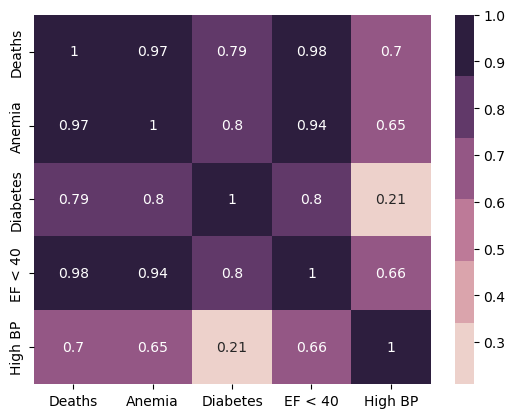

In [28]:
sns.heatmap(aggregate_correlation, annot=True, cmap=sns.cubehelix_palette())
plt.show(sns)